In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import model_statistics as ms
from sklearn.model_selection import train_test_split
from linear_regression import LinearRegression

# Importing Data

In [ ]:
df = pd.read_csv('advertising.csv')

# Adding Non-Linear Features

In [18]:
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_squared'] = df['TV'] ** 2

# Training Process

In [19]:
cols = ['TV', 'Radio', 'Newspaper', 'TV_Radio', 'TV_squared']
x = df[cols]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=67)

In [ ]:
model = LinearRegression(learning_rate=0.01, iterations=1000000, epsilon=1e-9, 
                         lamda=0.3, regularization='lasso')
x_train_scaled = model.min_normalization(x_train)

In [21]:
model.fit(x_train_scaled, y_train)

iteration: 0, cost: 131.15547138755517
iteration: 100000, cost: 0.9161798678394839
iteration: 200000, cost: 0.912937789221425
The model has found the optimal coefficients. 
 iterations: 202229 
 cost: 0.9129354319686113


In [43]:
model.coef_rescale()
model.weights

TV            0.072026
Radio         0.049843
Newspaper    -0.004781
TV_Radio      0.000440
TV_squared   -0.000102
dtype: float64

# Testing

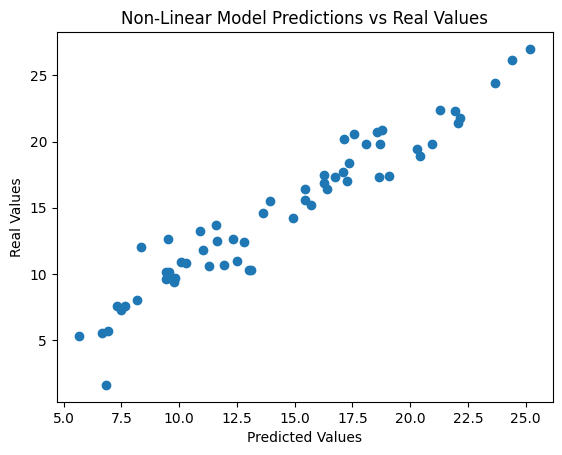

In [47]:
predictions = model.predict(x_test)

plt.scatter(predictions, y_test)
plt.title('Non-Linear Model Predictions vs Real Values')
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
r = ms.correlation(predictions, y_test)
mae = ms.MeanAbsError(predictions, y_test)
rmse = ms.RMSE(predictions, y_test)

print(f'R: {r*100:.2f}%, R²: {r**2*100:.2f}%')
print(f'Mean Absolute Error (MAE): {mae:.2f} \nRoot Mean Squared Error (RMSE): {rmse:.2f}')

R: 96.19%, R²: 92.53%
Mean Absolute Error (MAE): 1.17 
Root Mean Squared Error (RMSE): 2.42
